#### 身高与体重

In [4]:
import pandas as pd
import statsmodels.api as sm
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Read CSV data

In [8]:
data = pd.read_csv('weight.csv')
data = data[data.height > 120]

Generate scatterplot to determine fitness of linear regression

In [9]:
trace = go.Scatter(x=data.height, y=data.weight, mode='markers')

layout = go.Layout(
    width=900,
    height=500,
    xaxis=dict(title='Height',titlefont=dict(family='Consolas, monospace',size=15)),
    yaxis=dict(title='Weight',titlefont=dict(family='Consolas, monospace',size=15))
)

data2 = [trace]
fig = go.Figure(data=data2, layout=layout)

iplot(fig)

Run linear regression

In [10]:
X = data.height
y = data.weight
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     288.3
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           2.01e-40
Time:                        18:28:38   Log-Likelihood:                -707.79
No. Observations:                 199   AIC:                             1420.
Df Residuals:                     197   BIC:                             1426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -130.7470     11.563    -11.308      0.000    -153.550    -107.944
height         1.1492      0.068     16.978      0.000       1.016       1.283
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.622
Skew:                           0.766   Prob(JB):                     1.40e-17
Kurtosis:                       5.648   Cond. No.                     3.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

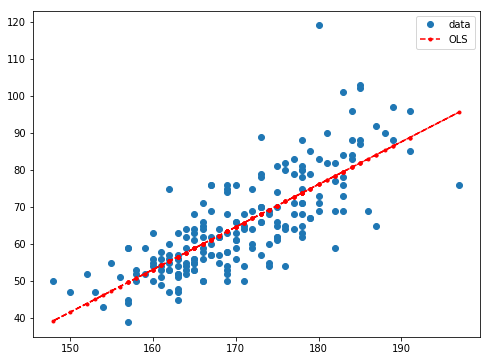

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data.height, y, 'o', label="data")
ax.plot(data.height, model.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.show()